In [17]:
import numpy as np
from dt_code import SpectraReduction
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 16

In [4]:
# Reduced data with a wavelength solution and errors
ref_file = '/Users/arcticfox/Documents/atmospheres/v1298tau/data/N20200122G0066m.fits'

# Requires a directory where all the raw FITS files are
# Set reload = False for the first go-around. After, setting reload = True saves time
dt_obj = SpectraReduction(fn_dir='/Users/arcticfox/Downloads/gemini_data/',
                           ref_file=ref_file, reload=False)

### Example -- master median flat frame

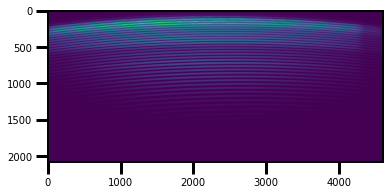

In [5]:
plt.imshow(dt_obj.med_flat.T)

### Example -- Discrete box model around a given order

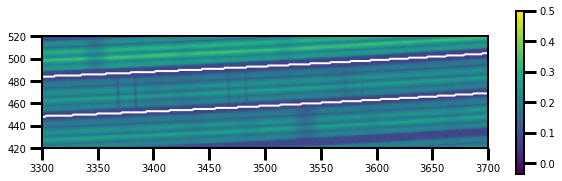

In [15]:
plt.figure(figsize=(10,3))
plt.imshow(dt_obj.science_frames[10].T, vmax=0.5)
plt.xlim(3300,3700)
plt.ylim(420,520)
plt.plot(dt_obj.discrete_model[10], 'w', lw=2)
plt.plot(dt_obj.discrete_model[11], 'w', lw=2)
plt.colorbar()

### Barycentric correction for wavelengths

In [16]:
dt_obj.barycentric_correction('V1298 Tau')

### Extracts the orders

In [9]:
dt_obj.extract_data()

100%|██████████| 53/53 [01:13<00:00,  1.34s/it]


### Example -- Raw and corrected spectra for H-alpha order

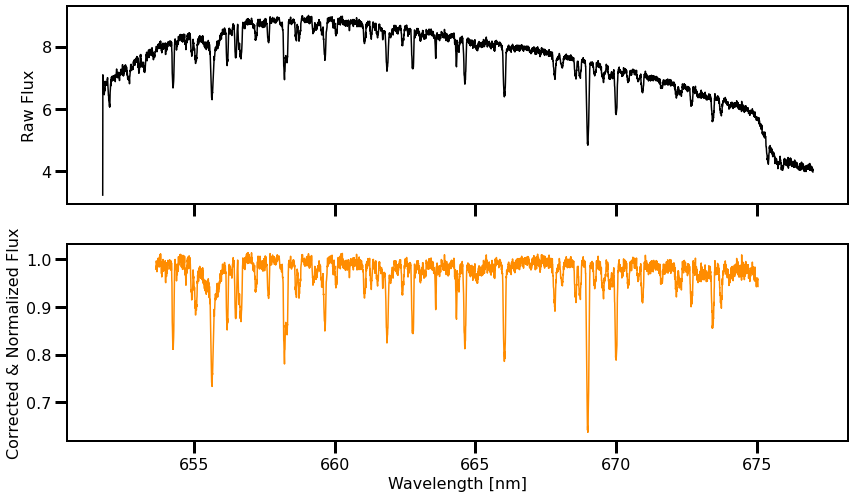

In [20]:
i, ind = 11, 11
fig, (ax1, ax2) = plt.subplots(figsize=(14,8), nrows=2,
                               sharex=True)

ax1.plot(dt_obj.wavelengths[i][ind], 
         dt_obj.spectra[i][ind], 'k')
ax2.plot(dt_obj.corrected_wavelengths[i][ind], 
         dt_obj.corrected_spectra[i][ind], 'darkorange')

ax1.set_ylabel('Raw Flux')
ax2.set_ylabel('Corrected & Normalized Flux')
plt.xlabel('Wavelength [nm]');